## Problem statement

Use scikit learn’s LogisticRegression class to model and make predictions on the  
following two datasets: 

1)  https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset 

Using the model, make predictions of the demand for bikes when the windspeed is  
minimum and maximum. Plot the ROC curve. 


In [162]:
# Importing the necessary packages
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
import seaborn as sns
%matplotlib inline 
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [163]:
#reading the data from csv file
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [164]:
# chekcing the describe function
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [165]:
# checking the information about null values, datatype using info function
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [166]:
# Chekcing for the null values
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [167]:
# It indicates that there are no null values

Exploring the data

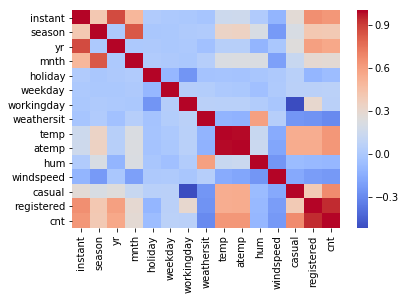

In [168]:
## Correlation plot:

sns.heatmap(df.corr(),cmap='coolwarm')

In [169]:
# From the correlation matrics temp and atemp are highly correlated so removing one feature (temp)
del df['temp']

In [170]:
# checking the dataset
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.229270,0.436957,0.186900,82,1518,1600


In [171]:
# checking the statistics of target variable
df['cnt'].describe()

count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64

In [172]:
# converting the target variable in discrete and placing threshold as 4600
df['High'] = df.cnt.map(lambda x: 1 if x>4600 else 0)

# Building, evaluating and ROC curve

In [173]:
# loading the independent and dependent variables
X = df[['windspeed']]
y = df['High']

In [174]:
# Splitting the dataset into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [175]:
# fitting the train data to model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [176]:
# predicting the values using the test data
pred=logreg.predict(X_test)

In [177]:
# Checking the accuracy
print(metrics.accuracy_score(y_test,pred))

0.5727272727272728


when the wind speed is minimum

In [178]:
minval = df.windspeed.min()
print(logreg.predict(minval))
print(logreg.predict_proba(minval))

[1]
[[0.44937194 0.55062806]]


when the wind speed is minimum

In [179]:
maxval=df.windspeed.max()
print(logreg.predict(maxval))
print(logreg.predict_proba(maxval))

[0]
[[0.64939015 0.35060985]]


In [180]:
# Plotting the ROC curve

In [181]:
# fpr=false positve rate, tpr=true positive rate
fpr, tpr,_=roc_curve(logreg.predict(X_test),y_test,drop_intermediate=False)

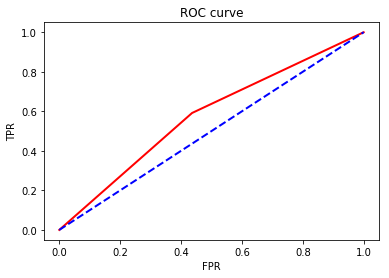

In [182]:
plt.plot(fpr, tpr, color='red',lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

2) MNIST Dataset 

In [183]:
# importing the packages
from sklearn.datasets import load_digits

In [184]:
# creating the mnist object and loading the data
mnist=load_digits()

In [185]:
# No of rows and columns in the mnist dataset
mnist.data.shape

(1797, 64)

In [186]:
# Data in mnist dataset
mnist.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [187]:
# Target variabe in MNIST dataset
mnist.target

array([0, 1, 2, ..., 8, 9, 8])

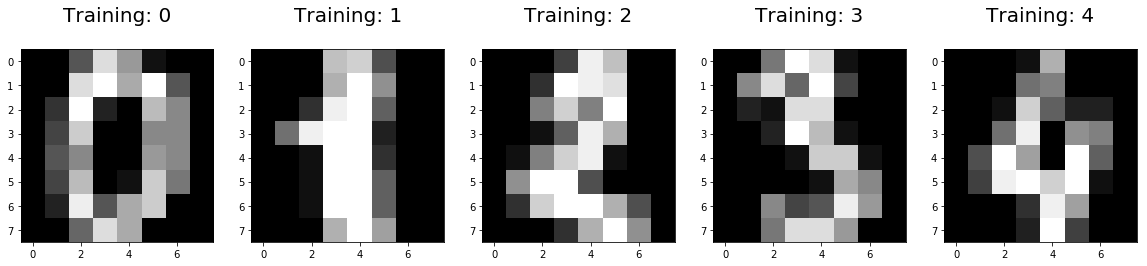

In [194]:
# Plotting the 5 observations
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(mnist.data[0:5], mnist.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [189]:
# Splitting the data into train and test data set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.25, random_state=0)

In [190]:
X_train.shape

(511, 1)

In [191]:
# creatign the logistic regression and fitting the train dataset
from sklearn.linear_model import LogisticRegression
log_mnist=LogisticRegression()
log_mnist.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [192]:
# Predict for test dataset
predictions = log_mnist.predict(x_test)

In [193]:
# calculating the accuracy of model
score = log_mnist.score(x_test, y_test)
print(score)

0.9533333333333334


The accuracy of logistic regression model for MNIST datset is 0.9533